<table>
    <tr>
        <td><img src="./img/Macc.png" width="auto"/></td>
        <td>
            <table><tr>
            <h1 style="color:blue;text-align:center, text-weight: bold">Lógica para Ciencias de la Computación</h1></td>
            </tr></table>   
        <td>&nbsp;</td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">3ra Entraga Proyecto</p></tp>
            <tp><p style="font-size:150%;text-align:center">Propuesta visualización para monitorias personalizadas</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

# Objetivo <a class="anchor" id="inicio"></a>

En esta entrega del proyecto se propone una posible interfaz gráfica la cual pueda dar una visualización de las posibles soluciones a una personalización de la asignación de monitorias para cualquier institución educativa del mundo. Esto fue construido con conocimientos que se han adquirido a lo largo del curso "Lógica para las ciencias de la computación" de la Universidad del Rosario.

# Secciones

1. [Metodo de uso]()
2. [Ejemplificación de posibles soluciones]()


# Metodos de uso.

([Volver al inicio](#inicio))

En este caso, para que la solución gráfica tienga una solución apropiada, esta debe descargar todas sus dependencias como se muestra a continuación:

In [1]:
from interfaz_grafica import *

In [2]:
%matplotlib inline

In [3]:
from interfaz_grafica import Horario

Ahora, es necesario crear un objeto horario, par que este pueda acceder a todas las funciones contruidas, para dar solucion a nuestra problematica

In [4]:
h = Horario()

Por ultimó, se ejecuta la función: visualizar_horario

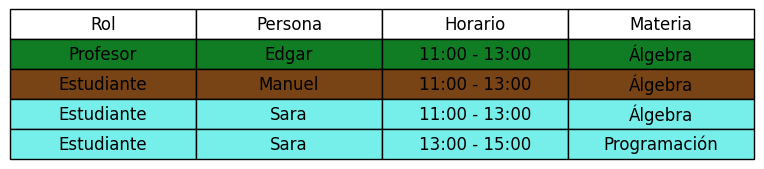

In [5]:
I ={h.H.ravel([1, 1, 1, 1]):True, h.H.ravel([0, 1, 1, 1]):True,h.H.ravel([0, 2, 1, 1]):True,h.H.ravel([0, 2, 2, ]):True}
h.visualizar_est(I)

# Ejemplificación de posibles soluciones.

([Volver al inicio](#inicio))

se procede a mostrar una ejemplificación de poisbles visualizaciones a soluciones para nuestro problema.

Se tienen las posibles opciones de representacion:
Todas las materias disponibles.
Todas las materias no disponibles.
Solo una materia disponible.
Solo una materia no disponible.

In [6]:
from Logica import *

## Visualización primera regla.

In [7]:
# Caso 1: Todas las materias disponibles
h.reglas[0]
R1 = tseitin(h.reglas[0])
s, dic = dpll(R1, {})

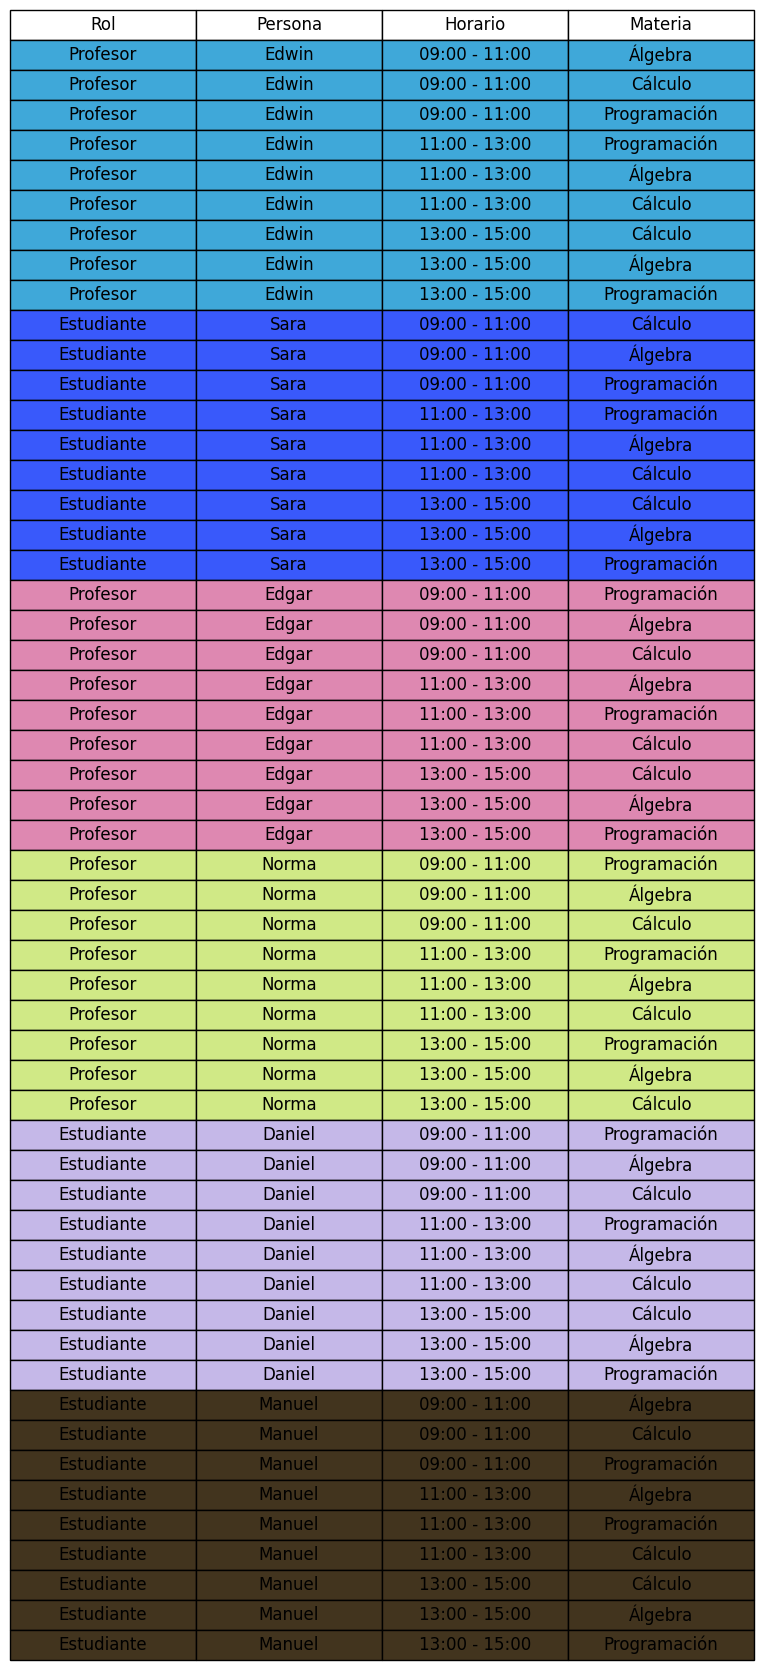

In [8]:
if s == 'Satisfacible':
    h.visualizar_est(dic)
else:
    print('no es satisfacible')

## Visualización segunda regla. (PENDIENTE POR CORRECIÓN)

In [9]:
# Caso 2: Todas las materias disponibles
h.reglas[1]
R2 = tseitin(h.reglas[1])
s, dic2 = dpll(R2, {})

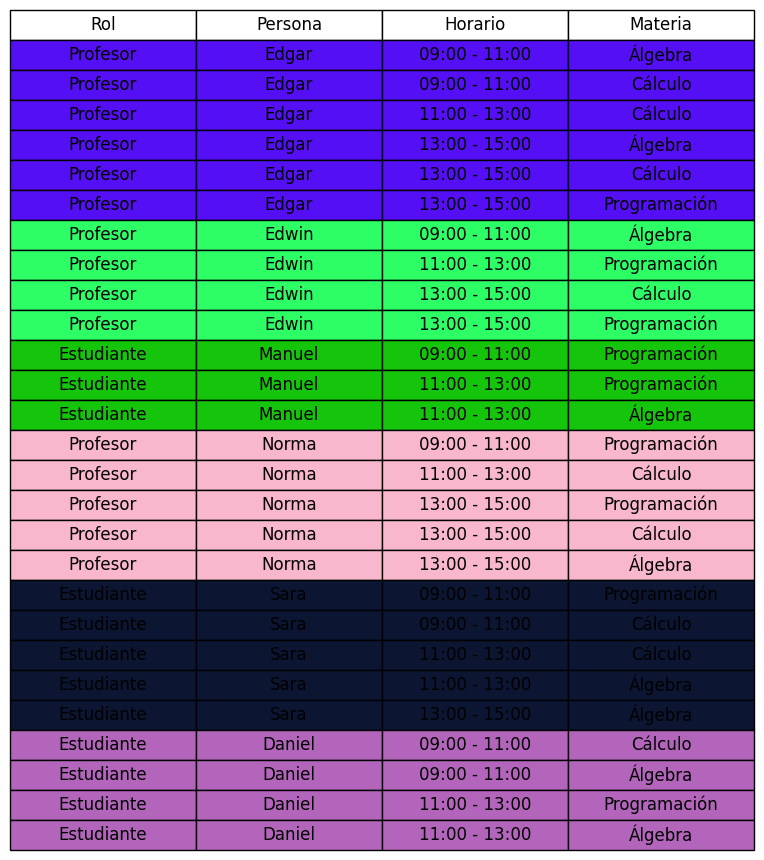

In [10]:
if s == 'Satisfacible':
    h.visualizar_est(dic2)
else:
    print('No es satisfacible')

## Visualización tercera regla.

$$\bigwedge_{p \in profesores} \bigwedge_{e \in estudiantes}\bigwedge_{h \in horarios} \bigwedge_{m \in materias} \Bigg(\Bigg( P(e, h, m) \land Q(p, h, m )\Bigg) \rightarrow \bigwedge_{p' \neq p}\neg \Bigg(P(e, h, m) \land Q(p', h, m)\Bigg) \Bigg)$$


"Toda monitoria puede tener máximo un profesor"

In [ ]:
# Caso 2: Todas las materias disponibles
h.reglas[2]
R3 = tseitin(h.reglas[2])
s, dic3 = dpll(R3, {})

In [ ]:
if s == 'Satisfacible':
    h.visualizar_est(dic3)
else:
    print('No es satisfacible')